In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/python/monthly-car-sales.csv')
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [2]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


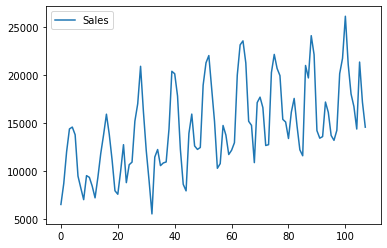

In [3]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [5]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [6]:
df.columns=['ds','y']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      108 non-null    object
 1   y       108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [8]:
df['ds']=pd.to_datetime(df['ds'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      108 non-null    datetime64[ns]
 1   y       108 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [10]:
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [11]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from fbprophet import Prophet

In [13]:
model=Prophet()

In [14]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future=list()
for i in range(1,13):
  date='1968-%02d'% i
  future.append([date])
future=pd.DataFrame(future)
future.columns=['ds']
future['ds']=pd.to_datetime(future['ds'])

In [16]:
future

,ds
0,1968-01-01
1,1968-02-01
2,1968-03-01
3,1968-04-01
4,1968-05-01
5,1968-06-01
6,1968-07-01
7,1968-08-01
8,1968-09-01
9,1968-10-01


In [17]:
forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1968-01-01,17795.101137,12754.204350,15943.745426,17795.101137,17795.101137,-3460.363368,-3460.363368,-3460.363368,-3460.363368,-3460.363368,-3460.363368,0.0,0.0,0.0,14334.737769
1,1968-02-01,17850.076787,13383.046956,16461.005525,17850.076787,17850.076787,-2944.120823,-2944.120823,-2944.120823,-2944.120823,-2944.120823,-2944.120823,0.0,0.0,0.0,14905.955964
2,1968-03-01,17901.505622,19302.402116,22425.684615,17901.505622,17901.505622,2940.644880,2940.644880,2940.644880,2940.644880,2940.644880,2940.644880,0.0,0.0,0.0,20842.150502
3,1968-04-01,17956.481273,21339.939853,24466.982424,17956.481273,17956.481273,4913.613942,4913.613942,4913.613942,4913.613942,4913.613942,4913.613942,0.0,0.0,0.0,22870.095215
4,1968-05-01,18009.683516,22620.150350,25667.264281,18009.683516,18009.683516,6166.527646,6166.527646,6166.527646,6166.527646,6166.527646,6166.527646,0.0,0.0,0.0,24176.211162
5,1968-06-01,18064.659167,19448.540887,22685.763533,18064.659167,18064.659167,2993.020023,2993.020023,2993.020023,2993.020023,2993.020023,2993.020023,0.0,0.0,0.0,21057.679190
6,1968-07-01,18117.861409,16111.806862,19131.404818,18117.861409,18117.861409,-532.371981,-532.371981,-532.371981,-532.371981,-532.371981,-532.371981,0.0,0.0,0.0,17585.489428
7,1968-08-01,18172.837060,13647.863031,16913.586764,18172.837060,18172.837060,-2883.575173,-2883.575173,-2883.575173,-2883.575173,-2883.575173,-2883.575173,0.0,0.0,0.0,15289.261887
8,1968-09-01,18227.812711,12201.673696,15291.136407,18227.812711,18227.812711,-4506.374429,-4506.374429,-4506.374429,-4506.374429,-4506.374429,-4506.374429,0.0,0.0,0.0,13721.438281
9,1968-10-01,18281.014954,16634.874636,19794.376984,18281.014954,18281.014954,-147.104077,-147.104077,-147.104077,-147.104077,-147.104077,-147.104077,0.0,0.0,0.0,18133.910877


In [18]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1968-01-01,14334.737769,12754.204350,15943.745426
1,1968-02-01,14905.955964,13383.046956,16461.005525
2,1968-03-01,20842.150502,19302.402116,22425.684615
3,1968-04-01,22870.095215,21339.939853,24466.982424
4,1968-05-01,24176.211162,22620.150350,25667.264281
5,1968-06-01,21057.679190,19448.540887,22685.763533
6,1968-07-01,17585.489428,16111.806862,19131.404818
7,1968-08-01,15289.261887,13647.863031,16913.586764
8,1968-09-01,13721.438281,12201.673696,15291.136407
9,1968-10-01,18133.910877,16634.874636,19794.376984


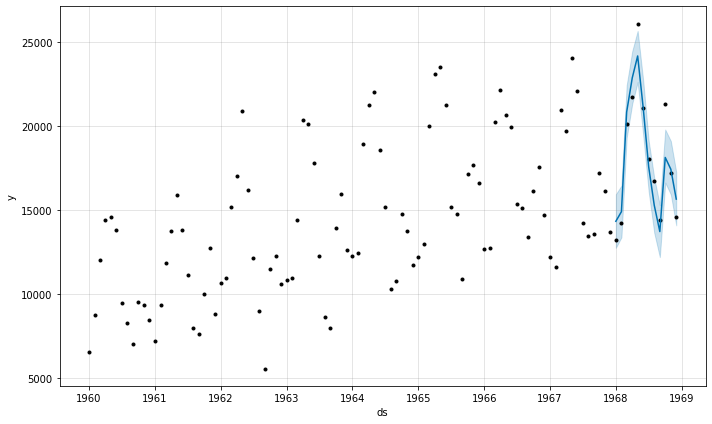

In [19]:
model.plot(forecast)
plt.show()

In [20]:
future=list()
for i in range(1,13):
  date='1969-%02d'%i
  future.append([date])
future=pd.DataFrame(future)
future.columns=['ds']
future['ds']=pd.to_datetime(future['ds'])

In [21]:
future

,ds
0,1969-01-01
1,1969-02-01
2,1969-03-01
3,1969-04-01
4,1969-05-01
5,1969-06-01
6,1969-07-01
7,1969-08-01
8,1969-09-01
9,1969-10-01


In [22]:
forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1969-01-01,18444.168498,13786.445308,16931.645974,18444.168498,18444.175009,-3068.208405,-3068.208405,-3068.208405,-3068.208405,-3068.208405,-3068.208405,0.0,0.0,0.0,15375.960093
1,1969-02-01,18499.144149,14542.231528,17824.465519,18498.177826,18500.412066,-2356.872476,-2356.872476,-2356.872476,-2356.872476,-2356.872476,-2356.872476,0.0,0.0,0.0,16142.271673
2,1969-03-01,18548.799576,19724.650786,22964.925788,18546.433372,18551.437729,2803.033064,2803.033064,2803.033064,2803.033064,2803.033064,2803.033064,0.0,0.0,0.0,21351.832640
3,1969-04-01,18603.775227,21852.662340,25070.480278,18598.808670,18608.470811,4874.114585,4874.114585,4874.114585,4874.114585,4874.114585,4874.114585,0.0,0.0,0.0,23477.889811
4,1969-05-01,18656.977469,23394.152829,26555.221338,18649.045480,18664.334282,6331.463438,6331.463438,6331.463438,6331.463438,6331.463438,6331.463438,0.0,0.0,0.0,24988.440907
5,1969-06-01,18711.953120,20537.149267,23686.081432,18700.982257,18721.615665,3537.088033,3537.088033,3537.088033,3537.088033,3537.088033,3537.088033,0.0,0.0,0.0,22249.041153
6,1969-07-01,18765.155363,16310.478889,19509.978373,18751.221646,18777.971223,-862.825439,-862.825439,-862.825439,-862.825439,-862.825439,-862.825439,0.0,0.0,0.0,17902.329924
7,1969-08-01,18820.131014,14065.642503,17266.790564,18802.830610,18836.741721,-3089.929213,-3089.929213,-3089.929213,-3089.929213,-3089.929213,-3089.929213,0.0,0.0,0.0,15730.201800
8,1969-09-01,18875.106665,12554.466623,15767.527218,18853.974747,18895.160841,-4639.149594,-4639.149594,-4639.149594,-4639.149594,-4639.149594,-4639.149594,0.0,0.0,0.0,14235.957070
9,1969-10-01,18928.308907,17088.037292,20314.160745,18903.704167,18952.527191,-256.528780,-256.528780,-256.528780,-256.528780,-256.528780,-256.528780,0.0,0.0,0.0,18671.780127


In [23]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,15375.960093,13786.445308,16931.645974
1,1969-02-01,16142.271673,14542.231528,17824.465519
2,1969-03-01,21351.832640,19724.650786,22964.925788
3,1969-04-01,23477.889811,21852.662340,25070.480278
4,1969-05-01,24988.440907,23394.152829,26555.221338
5,1969-06-01,22249.041153,20537.149267,23686.081432
6,1969-07-01,17902.329924,16310.478889,19509.978373
7,1969-08-01,15730.201800,14065.642503,17266.790564
8,1969-09-01,14235.957070,12554.466623,15767.527218
9,1969-10-01,18671.780127,17088.037292,20314.160745


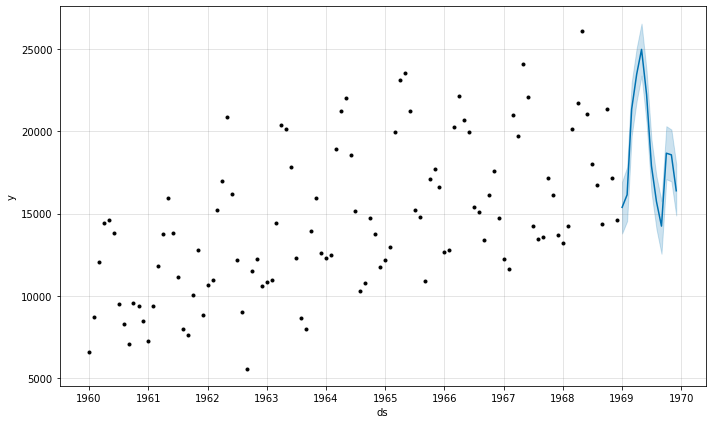

In [24]:
model.plot(forecast)
plt.show()

In [25]:
df.shape

(108, 2)

In [26]:
train=df.drop(df.index[-12:])
train

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
91,1967-08-01,13434
92,1967-09-01,13598
93,1967-10-01,17187
94,1967-11-01,16119


In [27]:
model=Prophet()
model.fit(train)
future=list()
for i in range(1,13):
  date='1968-%02d'%i
  future.append([date])
future=pd.DataFrame(future)
future.columns=['ds']
future['ds']=pd.to_datetime(future['ds'])
forecast=model.predict(future)
y_true=df['y'][-12:].values

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
y_true=df['y'][-12:].values

In [29]:
y_pred=forecast['yhat'].values

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
loss=mean_absolute_error(y_true,y_pred)

In [32]:
loss

1336.813762330031

In [33]:
import joblib

In [34]:
joblib.dump(model,'monthly-car-sales')

['monthly-car-sales']

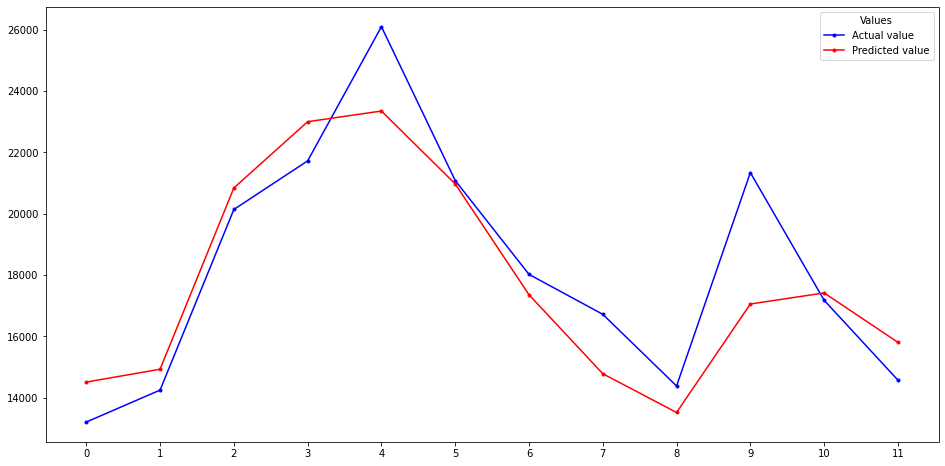

In [35]:
import numpy as np
plt.figure(figsize=(16,8))
plt.plot(y_true,label='Actual value',c='blue',marker='.')
plt.plot(y_pred,label='Predicted value',c='red',marker='.')
plt.xticks(np.arange(0,12,1))
plt.legend(title=('Values'))
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


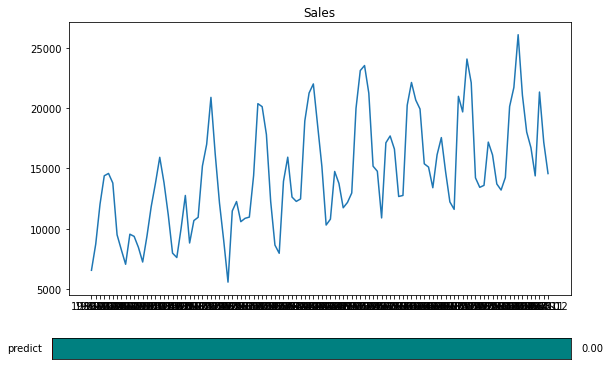

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
df=pd.read_csv('/content/drive/MyDrive/python/monthly-car-sales.csv',index_col='Month')
month=[str(_) for _ in df.index]
sales=df['Sales']
fig,ax=plt.subplots(figsize=(9,6))
ax.plot(month,sales)
ax.set_title(sales.name)
plt.subplots_adjust(bottom=0.25)
ax_slider=plt.axes([0.1,0.1,0.8,0.05],facecolor='teal')
def update_line(indx):
  ax.clear()
  ax.plot(month,dataset[indx])
  ax.set_title(dataset[indx].name)
  plt.draw()
slider=Slider(ax_slider,'predict',valmin=0,valmax=500,valinit=0,valstep=1)
slider.on_changed(update_line)
plt.show()